In [151]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker
from gwaxion import physics
import pandas as pd

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)


# Fast method

## Fixed initial spin

In [165]:
# create an array of BH masses in LIGO's band
n_mass = 1000
n_alpha = 1000

mbhs_array = np.logspace(0, 3, n_mass).reshape(n_mass, 1)
distance = 5E6 * physics.PC_SI
chi_i = 0.7

mbh_ex = 60

In [166]:
alphas_array = np.linspace(0, 0.5, n_alpha).reshape(1, n_alpha)

h0s, fgws = physics.h0_scalar_brito(mbhs_array, alphas_array, chi_i=chi_i, d=distance)
mbhs = np.repeat(mbhs_array, n_alpha, axis=1)

fgws_ma = np.ma.masked_array(fgws, mask=fgws<=0)
h0s_ma = np.ma.masked_array(h0s, mask=(h0s<=1E-30)|(np.isnan(h0s)))

norm = matplotlib.colors.LogNorm(vmin=1E-31, vmax=h0s_ma.max())

print h0s_ma.max()
# df1 = pd.DataFrame({'h0': h0s.flatten(), 'fgw': fgws.flatten(), 'mbhs': mbhs.flatten()})
# df1 = df1[df1['h0']>0]

6.83263983331e-25


In [4]:
# HEXBIN PLOT

# ax = plt.hexbin(mbhs.flatten(),fgws_ma.flatten(), C=h0s_ma.flatten(), xscale='log', yscale='log', cmap='Purples', norm=norm)
# cb = plt.colorbar(ax, norm=norm, label=r'$h_0$ (5 Mpc)')
# plt.ylabel(r'$f_{\rm GW}$ (Hz)')
# plt.xlabel(r'$M$ $(M_\odot)$')
# plt.ylim(5, 1e3)
# plt.show()
# plt.close()

In [5]:
# CONTOUR PLOT (no fill)

# cs = plt.contour(mbhs,fgws_ma, np.log10(h0s_ma), 20, cmap='viridis')#, locator=ticker.LogLocator(100))
# plt.ylim(5, 1E3)
# plt.xscale('log')
# plt.yscale('log')
# plt.show()
# plt.close()

In [167]:
# get maximum amplitude per mass

df1 = pd.DataFrame({'h0': h0s.flatten(), 'fgw': fgws.flatten(), 'mbhs': mbhs.flatten()})
df1 = df1[(df1['h0']>0)&(df1['fgw']>0)]

grouped = df1.groupby('mbhs')
fgwmaxs = []
for mbh in mbhs_array.flatten():
    df_mbh = grouped.get_group(mbh)
    fgwmaxs.append(df_mbh['fgw'][df_mbh['h0']==df_mbh['h0'].max()].iloc[0])

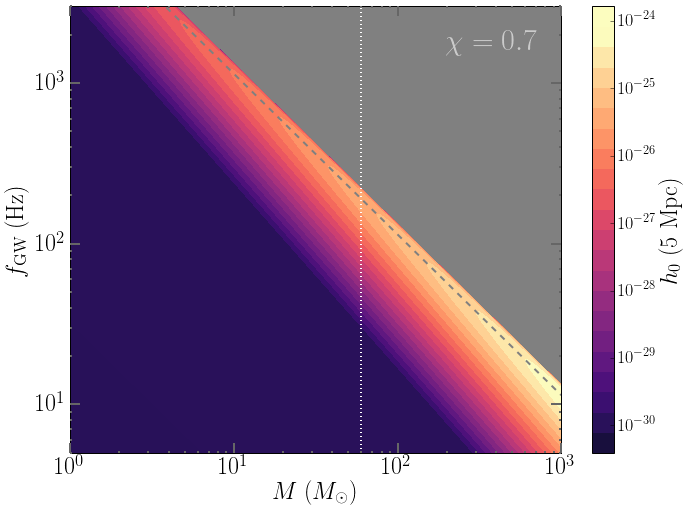

In [168]:
# FILLED CONTOUR PLOT

h0s_2 = h0s.copy()
h0s_2[(h0s_2<=1E-30)&(h0s_2>0)] = 1E-30
h0s_ma = np.ma.masked_array(h0s_2, mask=(np.isnan(h0s_2)))

fig, ax = plt.subplots(1, figsize=(11,8))

# manually fill the lower-left corner which otherwise looks gray
ax.fill_between(mbhs_array.flatten(), 0, fgwmaxs, facecolor='#281159')

# plot contours
cm = ax.contourf(mbhs,fgws_ma, h0s_ma, locator=ticker.LogLocator(numticks=100,base=2), cmap='magma', norm=norm)

#cs = plt.contour(mbhs,fgws_ma, h0s_ma, ticklocation=ticker.LogLocator(), colors='lavender', norm=norm)
# fmt = ticker.LogFormatterMathtext()
# fmt.create_dummy_axis()
# plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt=fmt, loc='best')

# plot peak-amplitude line
ax.plot(mbhs_array.flatten(), fgwmaxs, '--', color='gray', lw=2)

# plot vertical line at 50 Msun
ax.axvline(mbh_ex, c='w', ls=':', lw=2)

# add colorbar
cb_ticks = np.logspace(-30, -24, 7)# np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
cb = plt.colorbar(cm, norm=norm, label=r'$h_0$ (5 Mpc)', ticks=cb_ticks)
cb.ax.tick_params(labelsize=18) 

plt.ylim(5, 3E3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
ax.patch.set_facecolor("grey")

ax.tick_params(axis='both', color='0.4', which='both', width=2)
ax.tick_params(axis='both', length=10)

ax.annotate(r'$\chi=0.7$', xy=(0.95, 0.95), xycoords="axes fraction", 
            ha='right', va='top', fontsize=30, color='0.8')

fig.savefig('cmap_fgw_mbh_h0.pdf', bbox_inches='tight')

plt.show()
plt.close()

## Fixed initial mass

In [169]:
# create an array of BH masses in LIGO's band
n_spins = 1000
n_alpha = 500

mbh_i = mbh_ex
distance = 5E6 * physics.PC_SI
chis_array = np.linspace(0, 1, n_spins).reshape(n_spins, 1)

alphas_array = np.linspace(0, 0.5, n_alpha).reshape(1, n_alpha)

h0s, fgws = physics.h0_scalar_brito(mbh_i, alphas_array, chi_i=chis_array, d=distance)
chis = np.repeat(chis_array, n_alpha, axis=1)

fgws_ma = np.ma.masked_array(fgws, mask=fgws<=0)
h0s_ma = np.ma.masked_array(h0s, mask=(h0s<=1E-30) | (np.isnan(h0s)))

In [9]:
# cs = plt.contour(fgws_ma, chis, np.log10(h0s_ma), 20, cmap='viridis')#, locator=ticker.LogLocator(100))
#fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
#plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt=fmt, loc='best')
# plt.show()
# plt.close()

In [170]:
# get maximum amplitude per spin

df2 = pd.DataFrame({'h0': h0s.flatten(), 'fgw': fgws.flatten(), 'chi': chis.flatten()})
df2 = df2[(df2['h0']>0)&(df2['fgw']>0)]

grouped = df2.groupby('chi')
new_chis = grouped.groups.keys()
fgwmaxs = []
for chi in new_chis:
    df_chi = grouped.get_group(chi)
    fgwmaxs.append(df_chi['fgw'][df_chi['h0']==df_chi['h0'].max()].iloc[0])
chi_df = pd.DataFrame({'chi': new_chis, 'fgw': fgwmaxs})
chi_df.sort_values('chi', inplace=True)
#chi_df = chi_df[chi_df['chi']>=0.2]

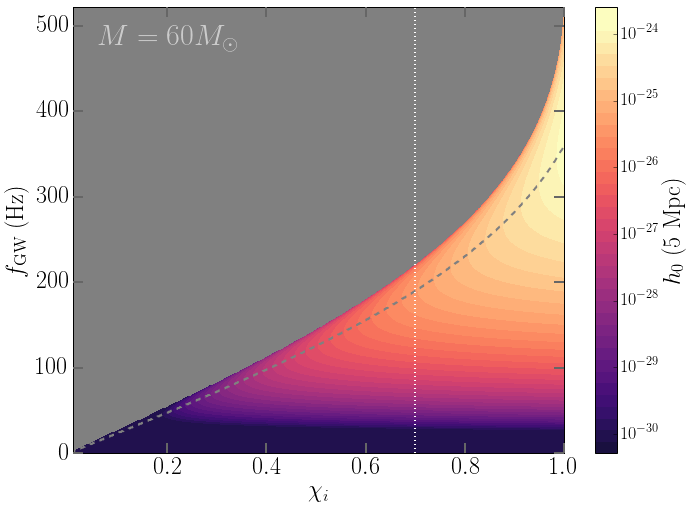

In [172]:
# FILLED CONTOUR PLOT
h0s_2 = h0s.copy()
h0s_2[(h0s_2<=1E-30)&(h0s_2>0)] = 1E-30
h0s_ma = np.ma.masked_array(h0s_2, mask=(np.isnan(h0s_2)))

norm = matplotlib.colors.LogNorm(vmin=1E-31, vmax=h0s_ma.max())

#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(1, figsize=(11,8))

cm = ax.contourf(chis, fgws_ma,h0s_ma, locator=ticker.LogLocator(numticks=500,base=1.5), cmap='magma', norm=norm)
#cs = plt.contour(mbhs,fgws_ma, h0s_ma, ticklocation=ticker.LogLocator(), colors='lavender', norm=norm)
# fmt = ticker.LogFormatterMathtext()
# fmt.create_dummy_axis()
# plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt=fmt, loc='best')

ax.plot(chi_df['chi'], chi_df['fgw'], '--', color='gray', lw=2)

# plot vertical line at 0.7
ax.axvline(0.7, c='w', ls=':', lw=2)

# cbaxes = inset_axes(ax, width="70%", height="5%", loc=9)
cb_ticks = np.logspace(-30, -24, 7)# np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
cb = plt.colorbar(cm, norm=norm, label=r'$h_0$ (5 Mpc)', ticks=cb_ticks)#, orientation='horizontal', cax=cbaxes)
cb.ax.tick_params(labelsize=18) 

ax.set_ylabel(r'$f_{\rm GW}$ (Hz)')
ax.set_xlabel(r'$\chi_i$')
ax.set_xlim(0.01,1)

ax.patch.set_facecolor("grey")

ax.tick_params(axis='both', color='0.4', which='both', width=2)
ax.tick_params(axis='both', length=10)

ax.annotate(r'$M=%i M_\odot$' % mbh_ex, xy=(0.05, 0.95), xycoords="axes fraction", 
            ha='left', va='top', fontsize=30, color='0.8')

fig.savefig('cmap_fgw_chi_h0.pdf', bbox_inches='tight')

plt.show()
plt.close()

# Slower alternative

In [12]:
mbhs_array = np.logspace(0, 3, n_mass)
h0s, fgws, alphas, mbhs = [], [], [], []
for mbh in mbhs_array:
    bh = physics.BlackHole(mass=mbh, chi=chi_i, msun=True)
    h0s_loc, fgws_loc, alphas_loc = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.0001)
    mbhs = np.concatenate([mbhs, [mbh]*len(h0s_loc)])
    h0s = np.concatenate([h0s, h0s_loc])
    fgws = np.concatenate([fgws, fgws_loc])
    alphas = np.concatenate([alphas, alphas_loc])

df2 = pd.DataFrame({'h0': h0s/distance, 'fgw': fgws, 'alpha': alphas, 'mbhs': mbhs})
df2 = df1[df1['h0']>0]

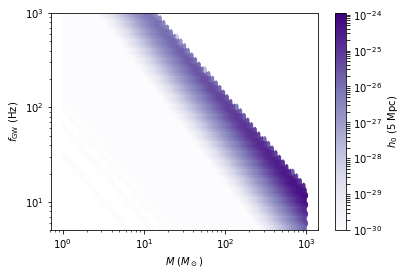

In [13]:
# plot
ax = plt.hexbin(df2['mbhs'], df2['fgw'], C=df2['h0'], xscale='log', yscale='log', cmap='Purples', norm=norm)
cb = plt.colorbar(ax, norm=norm, label=r'$h_0$ (5 Mpc)')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
plt.ylim(5, 1e3)
plt.show()
plt.close()